# Philippines conflicts

*Source:* https://data.humdata.org/dataset/ucdp-data-for-philippines

*Description:* The conflict data is from a UN database and counts the number of conflicts that occurred every year. It was last updated on February 3, 2022.

*Tech:* Python, pandas, QGIS, Illustrator

*Definitions:* https://ucdp.uu.se/downloads/ged/ucdp-ged-50-codebook.pdf

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
from plotnine import *
%matplotlib inline

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("conflict_data_phl.csv")
df

,id,relid,year,start_year,end_year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,iso3,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,NaN,NaN,#date+year,#date+year+start,#date+year+end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#group+name+first,NaN,NaN,#group+name+second,NaN,#meta+source,NaN,NaN,#description,NaN,NaN,#loc+name,NaN,#adm1+name,#adm2+name,#geo+lat,#country+code,#geo+lon,NaN,NaN,#country+name,NaN,#region+name,NaN,NaN,#date+start,#date+end,NaN,NaN,NaN,NaN,#affected+killed,NaN,NaN,NaN,NaN
1,123403.0,PHI-1989-1-217-51,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 3 July 1989 ""PHILIPPINES FORMS ELITE ANTI-RE...",NaN,NaN,NaN,military spokesman,1.0,Manila City,Manila City,Metropolitan Manila province,Manila City municipality,14.604200,PHL,120.982200,POINT (120.982200 14.604200),151082.0,Philippines,840.0,Asia,2.0,5.0,1989-01-01 00:00:00.000,1989-07-03 00:00:00.000,42.0,0.0,0.0,0.0,42,42.0,42.0,840.0,NaN
2,124029.0,PHI-1989-1-217-1,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 16 Jan 1989 ""EIGHT DIE IN PHILIPPINE FIGHTIN...",NaN,NaN,NaN,military spokesman,1.0,Makilala town,Makilala town,Cotabato province,Makilala municipality,6.951400,PHL,125.099200,POINT (125.099200 6.951400),139571.0,Philippines,840.0,Asia,1.0,1.0,1989-01-15 00:00:00.000,1989-01-15 00:00:00.000,0.0,8.0,0.0,0.0,8,8.0,8.0,840.0,NaN
3,125199.0,PHI-1989-1-217-2,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 31 Jan 1989 ""36 DIE IN PHILIPPINE INSURGENCY...",NaN,NaN,NaN,military spokesman,1.0,Sultan Kudarat town,Sultan Kudarat town,Maguindanao province,Sultan Kudarat municipality,7.270000,PHL,124.310600,POINT (124.310600 7.270000),140289.0,Philippines,840.0,Asia,1.0,1.0,1989-01-31 00:00:00.000,1989-01-31 00:00:00.000,4.0,0.0,0.0,0.0,4,4.0,4.0,840.0,NaN
4,122856.0,PHI-1989-1-217-3,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 7 Feb 1989 ""COMMUNIST REBELS KILL SEVEN SOLD...",NaN,NaN,NaN,military spokesman,4.0,Aurora province,Aurora province,Aurora province,NaN,16.000000,PHL,121.750000,POINT (121.750000 16.000000),153244.0,Philippines,840.0,Asia,1.0,1.0,1989-02-06 00:00:00.000,1989-02-06 00:00:00.000,4.0,0.0,0.0,0.0,4,4.0,4.0,840.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,226185.0,PHI-2016-1-15474-4,2016,2016,2016,1.0,Clear,1.0,308.0,308.0,Philippines: Mindanao,15474.0,15474.0,Government of Philippines - al-Harakat al-Isla...,154.0,154.0,Government of Philippines,6998.0,6998.0,al-Harakat al-Islamiyah,2.0,"""Agence France Presse,2016-04-11,Philippines m...",Agence France Presse;Associated Press Newswires,2016-04-11;2016-04-11,Philippines military kills four extremists aft...,Military,2.0,Tipo-Tipo town,hilly outskirts of Tipo Tipo town on Basilan i...,Basilan province,Tipo-Tipo municipality,6.581400,PHL,122.179400,POINT (122.179400 6.581400),139565.0,Philippines,840.0,Asia,1.0,1.0,2016-04-10 00:00:00.000,2016-04-10 00:00:00.000,0.0,4.0,0.0,0.0,4,4.0,4.0,840.0,N

# Cleaning the data

Dropping rows, columns, sort, looking for NaNs and duplicates.

In [3]:
df = df.drop(0, axis=0)

## Look for duplicates

In [4]:
df.duplicated().value_counts()
#No duplication across columns.

False    3738
dtype: int64

## Look for null values

In [5]:
df.isna().sum()
#A lot of NaNs in source_date, source_office, source_headline column. Below was an explanation.

id                      0
relid                   0
year                    0
start_year              0
end_year                0
active_year             0
code_status             0
type_of_violence        0
conflict_dset_id        0
conflict_new_id         0
conflict_name           0
dyad_dset_id            0
dyad_new_id             0
dyad_name               0
side_a_dset_id          0
side_a_new_id           0
side_a                  0
side_b_dset_id          0
side_b_new_id           0
side_b                  0
number_of_sources       0
source_article          0
source_office        2597
source_date          2597
source_headline      2597
source_original       206
where_prec              0
where_coordinates       0
where_description       3
adm_1                 201
adm_2                 797
latitude                0
iso3                    0
longitude               0
geom_wkt                0
priogrid_gid            0
country                 0
country_id              0
region      

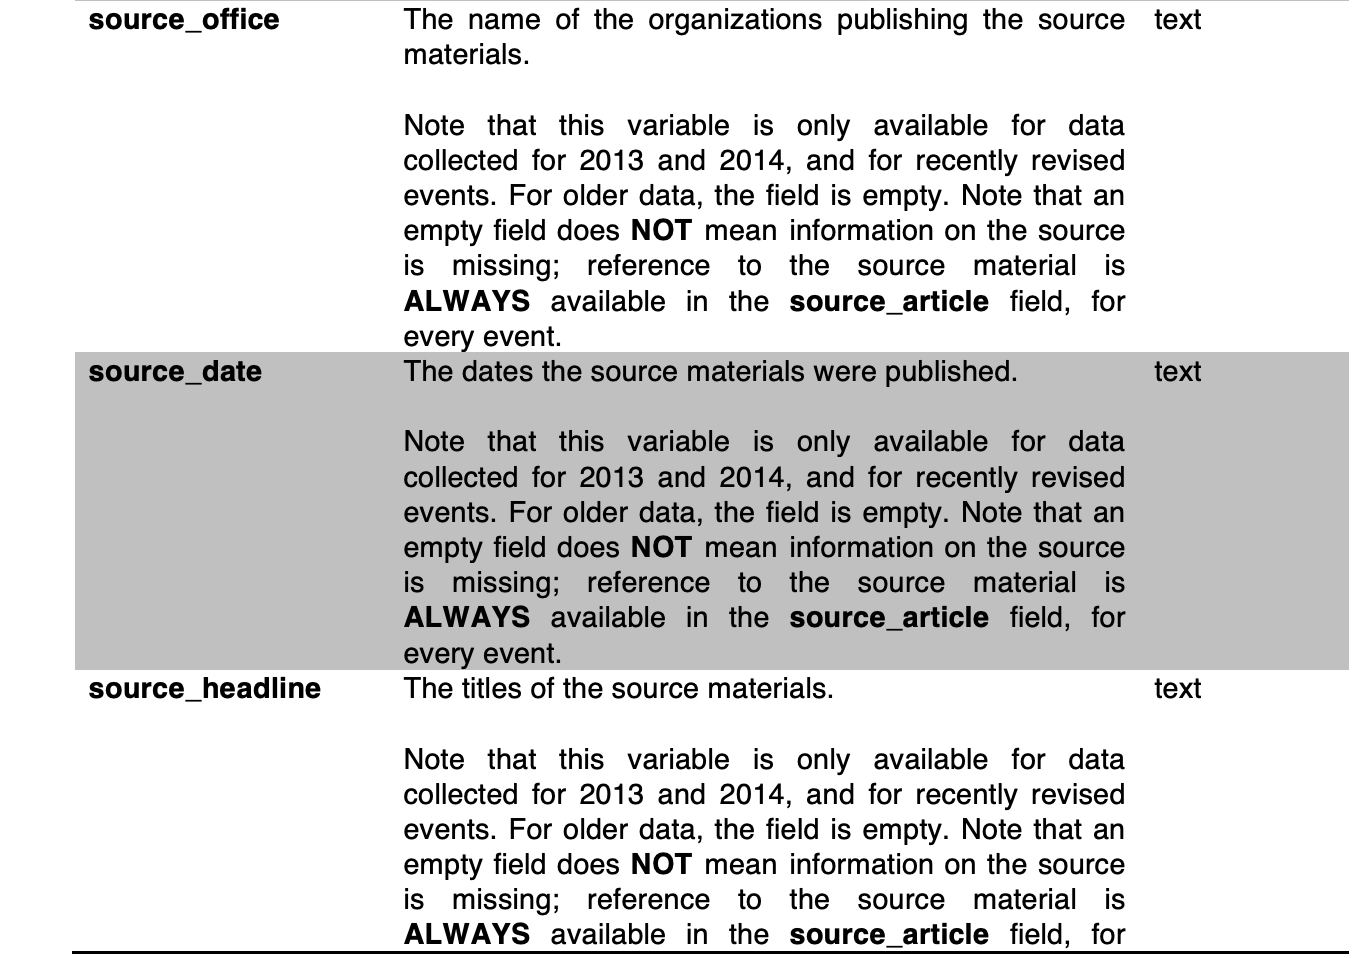

As we can see, there are a lot of NaNs in at least three columns:

* source_office
* source_date
* source_headline

We look into the documentation on why this is the case and we found the reasons above. As we can decipher from here, this does not affect the quality of the data we have to an extent that it would prevent us from making sensible analysis.

## Convert date columns to datetime

We convert **date_start** and **date_end** to allow us to get info on how much conflict started or ended at each particular day.

In [6]:
df.date_start = pd.to_datetime(df.date_start, format="%Y-%m-%d")
df.date_end = pd.to_datetime(df.date_end, format="%Y-%m-%d")
df

,id,relid,year,start_year,end_year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,iso3,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
1,123403.0,PHI-1989-1-217-51,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 3 July 1989 ""PHILIPPINES FORMS ELITE ANTI-RE...",NaN,NaN,NaN,military spokesman,1.0,Manila City,Manila City,Metropolitan Manila province,Manila City municipality,14.604200,PHL,120.982200,POINT (120.982200 14.604200),151082.0,Philippines,840.0,Asia,2.0,5.0,1989-01-01,1989-07-03,42.0,0.0,0.0,0.0,42,42.0,42.0,840.0,NaN
2,124029.0,PHI-1989-1-217-1,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 16 Jan 1989 ""EIGHT DIE IN PHILIPPINE FIGHTIN...",NaN,NaN,NaN,military spokesman,1.0,Makilala town,Makilala town,Cotabato province,Makilala municipality,6.951400,PHL,125.099200,POINT (125.099200 6.951400),139571.0,Philippines,840.0,Asia,1.0,1.0,1989-01-15,1989-01-15,0.0,8.0,0.0,0.0,8,8.0,8.0,840.0,NaN
3,125199.0,PHI-1989-1-217-2,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 31 Jan 1989 ""36 DIE IN PHILIPPINE INSURGENCY...",NaN,NaN,NaN,military spokesman,1.0,Sultan Kudarat town,Sultan Kudarat town,Maguindanao province,Sultan Kudarat municipality,7.270000,PHL,124.310600,POINT (124.310600 7.270000),140289.0,Philippines,840.0,Asia,1.0,1.0,1989-01-31,1989-01-31,4.0,0.0,0.0,0.0,4,4.0,4.0,840.0,NaN
4,122856.0,PHI-1989-1-217-3,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 7 Feb 1989 ""COMMUNIST REBELS KILL SEVEN SOLD...",NaN,NaN,NaN,military spokesman,4.0,Aurora province,Aurora province,Aurora province,NaN,16.000000,PHL,121.750000,POINT (121.750000 16.000000),153244.0,Philippines,840.0,Asia,1.0,1.0,1989-02-06,1989-02-06,4.0,0.0,0.0,0.0,4,4.0,4.0,840.0,NaN
5,123430.0,PHI-1989-1-217-4,1989,1989,1989,1.0,Clear,1.0,209.0,209.0,Philippines: Government,411.0,411.0,Government of Philippines - CPP,154.0,154.0,Government of Philippines,169.0,169.0,CPP,-1.0,"R 6 Feb 1989 ""PHILIPPINE ARMY MAJOR KILLED IN ...",NaN,NaN,NaN,police spokesman,2.0,Manila City,Manila City (suburb of),Metropolitan Manila province,Manila City municipality,14.604200,PHL,120.982200,POINT (120.982200 14.604200),151082.0,Philippines,840.0,Asia,1.0,1.0,1989-02-06,1989-02-06,2.0,1.0,1.0,0.0,4,4.0,4.0,840.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,226185.0,PHI-2016-1-15474-4,2016,2016,2016,1.0,Clear,1.0,308.0,308.0,Philippines: Mindanao,15474.0,15474.0,Government of Philippines - al-Harakat al-Isla...,154.0,154.0,Government of Philippines,6998.0,6998.0,al-Harakat al-Islamiyah,2.0,"""Agence France Presse,2016-04-11,Philippines m...",Agence France Presse;Associated Press Newswires,2016-04-11;2016-04-11,Philippines military kills four extremists aft...,Military,2.0,Tipo-Tipo town,hilly outskirts of Tipo Tipo town on Basilan i...,Basilan province,Tipo-Tipo municipality,6.581400,PHL,122.179400,POINT (122.179400 6.581400),139565.0,Philippines,840.0,Asia,1.0,1.0,2016-04-10,2016-04-10,0.0,4.0,0.0,0

## Create new column 'total_deaths'

We summed up all kinds of deaths for easier analysis later. But we are not dropping the breakdown for the same reason.

In [37]:
df['total_deaths'] = df.deaths_a + df.deaths_b + df.deaths_civilians
df.head()

,id,relid,year,start_year,end_year,active_year,type_of_violence,side_a,side_b,source_article,source_office,source_date,source_headline,source_original,adm_1,adm_2,latitude,longitude,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,total_deaths
1,123403.0,PHI-1989-1-217-51,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 3 July 1989 ""PHILIPPINES FORMS ELITE ANTI-RE...",NaN,NaN,NaN,military spokesman,Metropolitan Manila,Manila City municipality,14.604200,120.982200,5.0,1989-01-01,1989-07-03,42.0,0.0,0.0,0.0,42,42.0,42.0,42.0
2,124029.0,PHI-1989-1-217-1,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 16 Jan 1989 ""EIGHT DIE IN PHILIPPINE FIGHTIN...",NaN,NaN,NaN,military spokesman,Cotabato,Makilala municipality,6.951400,125.099200,1.0,1989-01-15,1989-01-15,0.0,8.0,0.0,0.0,8,8.0,8.0,8.0
3,125199.0,PHI-1989-1-217-2,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 31 Jan 1989 ""36 DIE IN PHILIPPINE INSURGENCY...",NaN,NaN,NaN,military spokesman,Maguindanao,Sultan Kudarat municipality,7.270000,124.310600,1.0,1989-01-31,1989-01-31,4.0,0.0,0.0,0.0,4,4.0,4.0,4.0
4,122856.0,PHI-1989-1-217-3,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 7 Feb 1989 ""COMMUNIST REBELS KILL SEVEN SOLD...",NaN,NaN,NaN,military spokesman,Aurora,NaN,16.000000,121.750000,1.0,1989-02-06,1989-02-06,4.0,0.0,0.0,0.0,4,4.0,4.0,4.0
5,123430.0,PHI-1989-1-217-4,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 6 Feb 1989 ""PHILIPPINE ARMY MAJOR KILLED IN ...",NaN,NaN,NaN,police spokesman,Metropolitan Manila,Manila City municipality,14.604200,120.982200,1.0,1989-02-06,1989-02-06,2.0,1.0,1.0,0.0,4,4.0,4.0,4.0


## Remove unnecessary columns

In [8]:
df = df.drop(['code_status', 'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id', 'dyad_name', 'gwnoa', 'gwnob'], axis=1)

In [9]:
df= df.drop(['iso3', 'where_description', 'where_coordinates', 'where_prec', 'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region', 'number_of_sources'], axis=1)
df= df.drop(['dyad_new_id', 'side_a_dset_id', 'side_a_new_id', 'side_b_dset_id', 'side_b_new_id', 'event_clarity'], axis=1)
df

,id,relid,year,start_year,end_year,active_year,type_of_violence,side_a,side_b,source_article,source_office,source_date,source_headline,source_original,adm_1,adm_2,latitude,longitude,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,total_deaths
1,123403.0,PHI-1989-1-217-51,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 3 July 1989 ""PHILIPPINES FORMS ELITE ANTI-RE...",NaN,NaN,NaN,military spokesman,Metropolitan Manila province,Manila City municipality,14.604200,120.982200,5.0,1989-01-01,1989-07-03,42.0,0.0,0.0,0.0,42,42.0,42.0,42.0
2,124029.0,PHI-1989-1-217-1,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 16 Jan 1989 ""EIGHT DIE IN PHILIPPINE FIGHTIN...",NaN,NaN,NaN,military spokesman,Cotabato province,Makilala municipality,6.951400,125.099200,1.0,1989-01-15,1989-01-15,0.0,8.0,0.0,0.0,8,8.0,8.0,8.0
3,125199.0,PHI-1989-1-217-2,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 31 Jan 1989 ""36 DIE IN PHILIPPINE INSURGENCY...",NaN,NaN,NaN,military spokesman,Maguindanao province,Sultan Kudarat municipality,7.270000,124.310600,1.0,1989-01-31,1989-01-31,4.0,0.0,0.0,0.0,4,4.0,4.0,4.0
4,122856.0,PHI-1989-1-217-3,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 7 Feb 1989 ""COMMUNIST REBELS KILL SEVEN SOLD...",NaN,NaN,NaN,military spokesman,Aurora province,NaN,16.000000,121.750000,1.0,1989-02-06,1989-02-06,4.0,0.0,0.0,0.0,4,4.0,4.0,4.0
5,123430.0,PHI-1989-1-217-4,1989,1989,1989,1.0,1.0,Government of Philippines,CPP,"R 6 Feb 1989 ""PHILIPPINE ARMY MAJOR KILLED IN ...",NaN,NaN,NaN,police spokesman,Metropolitan Manila province,Manila City municipality,14.604200,120.982200,1.0,1989-02-06,1989-02-06,2.0,1.0,1.0,0.0,4,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,226185.0,PHI-2016-1-15474-4,2016,2016,2016,1.0,1.0,Government of Philippines,al-Harakat al-Islamiyah,"""Agence France Presse,2016-04-11,Philippines m...",Agence France Presse;Associated Press Newswires,2016-04-11;2016-04-11,Philippines military kills four extremists aft...,Military,Basilan province,Tipo-Tipo municipality,6.581400,122.179400,1.0,2016-04-10,2016-04-10,0.0,4.0,0.0,0.0,4,4.0,4.0,4.0
3735,226831.0,PHI-2016-1-15475-1,2016,2016,2016,0.0,1.0,Government of Philippines,BIFM-K,"""PNA (Philippines News Agency),2016-07-26,Upda...",PNA (Philippines News Agency);PNA (Philippines...,2016-07-26;2016-07-26,"Update: 2 rebels killed, 3 soldiers wounded as...",Military,Maguindanao province,Shariff Saydona Mustapha municipality,6.926906,124.470197,1.0,2016-07-26,2016-07-26,1.0,6.0,0.0,0.0,7,7.0,7.0,7.0
3736,238057.0,PHI-2017-1-15475-0,2017,2017,2017,0.0,1.0,Government of Philippines,BIFM-K,"""PNA (Philippines News Agency),2017-01-27,Poli...",PNA (Philippines News Agency),2017-01-27,Police blames BIFF in Maguindanao clash; displ...,Police,Maguindanao province,Ampatuan municipality,6.816111,124.357222,1.0,2017-01-26,2017-01-26,0.0,4.0,0.0,0.0,4,4.0,4.0,4.0
3737,262338.0,PHI-2018-1-15475-3,2018,2018,2018,1.0,1.0,Government of Philippines,BIFM-K,"""Reuters News,2018-04-11,Philippine air and gr...",Reuters News,2018-04-11,Philippine air and ground assault kills 12 Isl...,Military,Maguindanao province,NaN,6.966700,124.616700,2.0,2018-04-09,2018-04-11,0.0,12.0,0.0,0.0,12,12.0,12.0,12.0


## Remove 'province' from locations

And rename names representing similar provinces (i.e. "Compostela Valley" and "Compostela valley"). This is to prepare to match with QGIS shapefile and population data.

In [10]:
df.adm_1 = df.adm_1.str.replace("province", "")
df.adm_1 = df.adm_1.str.replace("Province", "")
df.adm_1 = df.adm_1.str.replace("Compostela valley", "Compostela Valley")

## Integrating 'population' data

Before going to our analysis part, we are integrating here a population data of some provinces from the Philippine Statistics Authority. The data is as of May 2020. The provinces match the provinces where conflicts were recorded.

We will use them to compute a lot of things later on.

In [11]:
df2 = pd.read_excel("population.xlsx", sheet_name="province")
df2.sort_values('province')

,province,population
36,Abra,250985
27,Agusan del Norte,387503
9,Agusan del Sur,739367
64,Aklan,615475
22,Albay,1374768
...,...,...
46,Tawi-Tawi,440276
53,Zambales,649615
44,Zamboanga Sibugay,669840
30,Zamboanga del Norte,1047455


In [12]:
df2.province= df2.province.str.strip()
#to remove invisible spaces in between rows or columns

# Initial analysis

## What year recorded the highest number of deaths due to conflict? Plot it.

In [32]:
df2 = df.groupby('year').total_deaths.sum().to_frame()
df2.to_csv("annual_deaths.csv")

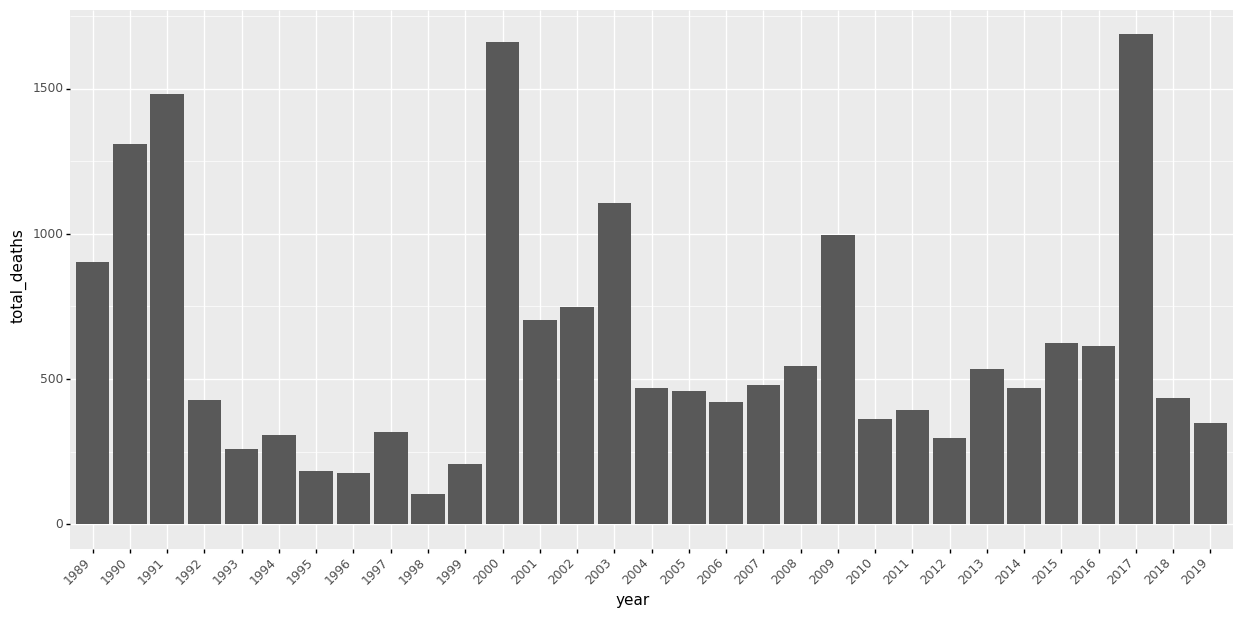

<ggplot: (300064411)>

In [14]:
plt = (
    ggplot(df, aes(x="year", y="total_deaths")) + 
    geom_col() +
    theme(axis_text_x  = element_text(angle = 45, hjust = 1), figure_size=(15,7))
)
plt
#ggsave(plt, "year_deaths.svg")

## Which year recorded the most number of conflict?

In [28]:
df.year.value_counts().sort_index(ascending=False).head(15)
#2017 also recorded the most number of conflicts since 1989, according to the data.

2019    130
2018    123
2017    265
2016    168
2015    203
2014    149
2013    139
2012    109
2011    149
2010    119
2009    155
2008    182
2007    103
2006    131
2005    124
Name: year, dtype: int64

**Interpretation**: Year 2017 under President Rodrigo Duterte represented the deadliest year as a result of conflicts in the Philippines, data showed.

That was the year when martial law was declared in Mindanao to fight terrorist groups.

## How many deaths were recorded from conflicts during the Duterte administration?

President Rodrigo Duterte is serving his term that started in June 2016.

This is the part where we integrate the population data by creating another dataframe with the ff elements:

* province
* total_deaths
* population
* deaths per 100,000 population (a new column named 'deaths_per_pop')

In [16]:
df3 = df[df.year>="2016"].groupby('adm_1').total_deaths.sum().to_frame().reset_index()
df3.columns = ['province', 'total_deaths']
df3.sort_values('province').head()

,province,total_deaths
0,Abra,2.0
1,Agusan del Norte,5.0
2,Agusan del Sur,10.0
3,Albay,5.0
4,Antique,7.0


In [33]:
df[df.year>="2016"].groupby('adm_1').deaths_b.sum().to_frame().reset_index().head(5)

,adm_1,deaths_b
0,Abra,0.0
1,Agusan del Norte,1.0
2,Agusan del Sur,8.0
3,Albay,2.0
4,Antique,7.0


In [18]:
df3.province= df3.province.str.strip()
#to remove invisible spaces in between rows or columns

In [19]:
merged = df2.merge(df3, on='province', suffixes=('_left'))
merged.head(10)

,province,population,total_deaths
0,Sulu,1000108,397.0
1,Basilan,426207,174.0
2,Maguindanao,1342179,356.0
3,Cotabato,325079,64.0
4,Lanao del Sur,1195518,1435.0
5,Davao del Sur,680481,49.0
6,Metropolitan Manila,13484462,28.0
7,Zamboanga del Sur,1050668,6.0
8,Compostela Valley,767547,34.0
9,Agusan del Sur,739367,10.0


In [34]:
merged['deaths_per_pop'] = merged.total_deaths / merged.population * 100000
merged.sort_values('deaths_per_pop', ascending=False).head(10)

,province,population,total_deaths,deaths_per_pop
4,Lanao del Sur,1195518,1435.0,120.031652
1,Basilan,426207,174.0,40.825233
0,Sulu,1000108,397.0,39.695713
2,Maguindanao,1342179,356.0,26.524033
3,Cotabato,325079,64.0,19.687522
5,Davao del Sur,680481,49.0,7.200789
8,Compostela Valley,767547,34.0,4.429696
40,Mountain,158200,6.0,3.792668
15,Masbate,908920,26.0,2.860538
23,Samar,793183,21.0,2.647561


Interpretation: Lanao del Sur is the place where most Filipinos die because of conflict, with deaths of 120 per 100,000 population. Why though? Let's see.

## Where do most conflicts happen?

In [21]:
df.adm_1.value_counts()
#Lanao del Sur ranks fourth in terms of having the most conflicts recorded since at least 1989 but...

Sulu                366
Basilan             323
Maguindanao         313
Cotabato            216
Lanao del Sur       176
                   ... 
Nueva Viscaya         2
Dinagat islands       1
Apayao                1
Nueva Vizcaya         1
Biliran               1
Name: adm_1, Length: 76, dtype: int64

In [22]:
df[df.year>="2016"].adm_1.value_counts().head(5)
#it has the most number of conflicts under the Duterte administration or since 2016.

Lanao del Sur     132
Sulu               95
Maguindanao        55
Basilan            36
Cotabato           26
Name: adm_1, dtype: int64

## A look at total deaths per year

In [36]:
df_pivot = df.pivot_table(columns="adm_1", index='year', values='total_deaths', aggfunc='sum', fill_value='0', dropna=False).reset_index()
df_pivot.head()

adm_1,year,Abra,Agusan del Norte,Agusan del Sur,Aklan,Albay,Antique,Apayao,Aurora,Basilan,Bataan,Batangas,Benguet,Biliran,Bohol,Bukidnon,Bulacan,Cagayan,Camarines Norte,Camarines Sur,Capiz,Catanduanes,Cavite,Cebu,Compostela Valley,Cotabato,Davao,Davao Oriental,Davao del Norte,Davao del Sur,Dinagat islands,Eastern Samar,Ifugao,Ilocos Norte,Ilocos Sur,Iloilo,Isabela,Kalinga,Kalinga-Apayao,Laguna,Lanao del Norte,Lanao del Sur,Leyte,Maguindanao,Masbate,Metropolitan Manila,Misamis Occidental,Misamis Oriental,Mountain,Negros Occidental,Negros Oriental,Northern Samar,Nueva Ecija,Nueva Viscaya,Nueva Vizcaya,Occidental Mindoro,Oriental Mindoro,Palawan,Pampanga,Pangasinan,Quezon,Rizal,Samar,Sarangani,Sorsogon,South Cotabato,Southern Leyte,Sultan Kudarat,Sulu,Surigao del Norte,Surigao del Sur,Tarlac,Tawi-Tawi,Zambales,Zamboanga Sibugay,Zamboanga del Norte,Zamboanga del Sur
0,1989,10.0,0,22.0,1.0,0,0.0,0,4.0,0,11.0,0,7.0,0,2.0,1.0,11.0,5.0,16.0,5.0,0,0,0,0,0,29.0,2.0,17.0,0,15.0,0,2.0,17.0,19.0,0,10.0,4.0,31.0,19.0,0,3.0,22.0,7.0,16.0,0,162.0,2.0,6.0,0,14.0,5.0,2.0,0,0,0,0,7.0,0,17.0,6.0,20.0,4.0,55.0,0,5.0,0.0,0,6.0,0,4.0,8.0,2.0,0,0,0,36.0,82.0
1,1990,0,0.0,55.0,0.0,0,9.0,0,0,0,5.0,0,0,0,0.0,6.0,2.0,14.0,0,0,0,0,0,0,0,34.0,10.0,0,0,44.0,0,131.0,11.0,8.0,0,0,0,0,111.0,4.0,17.0,8.0,75.0,41.0,1.0,28.0,83.0,92.0,2.0,28.0,0,28.0,7.0,0,0,0,0,0,6.0,7.0,8.0,0,23.0,0,1.0,0,7.0,25.0,9.0,0,283.0,0,0,0,0,17.0,30.0
2,1991,32.0,4.0,0.0,16.0,0,8.0,0,5.0,0,0,0,0,0,0,8.0,0,78.0,10.0,19.0,0,0,0,2.0,0,15.0,8.0,0,0,29.0,0,67.0,0,0,0,0,8.0,0,49.0,6.0,0,0,44.0,0,5.0,4.0,0,16.0,38.0,11.0,0,12.0,0,0,0,0,8.0,0,5.0,8.0,0,0,19.0,0,10.0,0,14.0,0,0,2.0,34.0,8.0,0,0,0,10.0,6.0
3,1992,0,0,0,0,5.0,0,0,0,0,0.0,0,1.0,0,0,0,0,33.0,3.0,0,3.0,0,0,0,0,4.0,0,4.0,0,32.0,0,0,0,0,0,9.0,4.0,0,10.0,0,12.0,0,11.0,2.0,4.0,3.0,0.0,0.0,55.0,10.0,0,0,0,22.0,0,0,0,0,3.0,0,0,0,16.0,12.0,0,17.0,0,0,0,0,66.0,0,0,0,0,9.0,1.0
4,1993,0,0,0,0,1.0,0,0,0,107.0,0,0,0,0,0,0,2.0,3.0,0.0,0,0,0,0.0,0,0,20.0,0,0,0,0.0,0,0,0,2.0,0,0,48.0,0,27.0,2.0,1.0,0.0,3.0,9.0,0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,4.0,0,0,0,0,3.0,0.0,0,0,0,0,0,0,0,4.0


## How many conflicts involved the national government?

In [24]:
df.side_a.value_counts()

Government of Philippines       3337
CPP                              141
ASG                               91
MILF                              84
IS                                23
Ampatuan militia                  16
Christians (Philippines)          13
BIFM                              13
Al-Khobar                         12
Forces of Jing Caludtiag           3
Lumad                              2
Government of Iraq                 1
Hadji Faizal Abdulkarim clan       1
Government of Malaysia             1
Name: side_a, dtype: int64

## How many civilians reportedly died because of conflicts involving government?

In [25]:
df.groupby('side_a').deaths_civilians.sum().sort_values(ascending=False)

side_a
Government of Philippines       860.0
ASG                             363.0
MILF                            326.0
CPP                             190.0
IS                              110.0
Ampatuan militia                 98.0
Al-Khobar                        45.0
BIFM                              0.0
Christians (Philippines)          0.0
Forces of Jing Caludtiag          0.0
Government of Iraq                0.0
Government of Malaysia            0.0
Hadji Faizal Abdulkarim clan      0.0
Lumad                             0.0
Name: deaths_civilians, dtype: float64